# Evaluation Metrics for Classification for Machine Learning

In [1]:
# Standard libraries
import os
import requests
import zipfile

# Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning and Metrics libraries
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [2]:
# URL for the dataset
url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"

In [3]:
# Check if the file already exists to avoid redundant downloads
if os.path.exists("bank_marketing.zip"):
    print("bank_marketing.zip already exists. Download canceled.")
else:
    try:
        response = requests.get(url)
        # If the request is successful status code 200
        if response.status_code == 200:
            # Write the data to a local ZIP file
            with open("bank_marketing.zip", "wb") as f:
                f.write(response.content)
            print("bank_marketing.zip downloaded successfully!")
        else:
            # In case of a failed request, provide a clear error message
            print(f"Error downloading file from {url}: HTTP {response.status_code}")
    except requests.exceptions.RequestException as e:
        # Handle any exceptions raised by the requests library
        print(f"Failed to download the file. Reason: {e}")

bank_marketing.zip already exists. Download canceled.


In [4]:
# Directory where the files will be extracted
extract_dir = "bank_marketing"

# Check if the directory already exists to avoid redundant extraction
if not os.path.exists(extract_dir):
    try:
        with zipfile.ZipFile("bank_marketing.zip", "r") as zip_ref:
            # Extract all files to the directory
            zip_ref.extractall(extract_dir)
            print(f"Files extracted to '{extract_dir}' directory.")
            # List the extracted files
            extracted_files = zip_ref.namelist()
            print(f"Files extracted ({len(extracted_files)} total):", extracted_files)
    except zipfile.BadZipFile:
        print("Error: The file 'bank_marketing.zip' is corrupted or not a valid ZIP file!")
else:
    print(f"Directory '{extract_dir}' already exists. Skipping extraction.")

Directory 'bank_marketing' already exists. Skipping extraction.


In [5]:
# Path to the bank.zip file
zip_path = "bank_marketing/bank.zip"

# Directory where the files will be extracted
extract_dir = "bank_marketing"

# Check if the bank.zip file exists
if os.path.exists(zip_path):
    try:
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            extracted_files = zip_ref.namelist()

            # Check if the first file in the zip already exists
            first_file_path = os.path.join(extract_dir, extracted_files[0])
            if os.path.exists(first_file_path):
                print("Files already exist. Skipping extraction.")
                print(f"Files in '{extract_dir}':", os.listdir(extract_dir))
            else:
                zip_ref.extractall(extract_dir)
                print(f"bank.zip extracted to '{extract_dir}' directory.")
                print("Files extracted:", extracted_files)
    except zipfile.BadZipFile:
        print("Error: The file 'bank.zip' is corrupted or not a valid ZIP file.")
else:
    print("bank.zip does not exist.")

Files already exist. Skipping extraction.
Files in 'bank_marketing': ['bank-additional.zip', 'bank-full.csv', 'bank.csv', 'bank.zip', 'bank-names.txt']


In [6]:
# Try to load the bank-full.csv data
try:
    bank_data = pd.read_csv("bank_marketing/bank-full.csv", sep=';')
    print("Data loaded successfully!")
    
    # Show the first few rows of the dataframe
    print(bank_data.head())
    
    # Show basic information about the dataframe
    print(bank_data.info())
    
except FileNotFoundError:
    print("Error: The file 'bank-full.csv' was not found in the 'bank_marketing' directory.")
except pd.errors.ParserError:
    print("Error: There was an issue parsing the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Data loaded successfully!
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data colu

In [7]:
# Rows of the dataset
bank_data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
# Information about the DataFrame
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# Column names of the dataset
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
# Drop the 'default' and 'loan' columns from the dataset
bank_data = bank_data.drop(columns=['default', 'loan'])

In [11]:
# Get the number of unique values per column
nunique_values = bank_data.nunique()

# Get unique values per column, limiting to first 10 unique values for readability
unique_values = [', '.join(map(str, bank_data[col].unique()[:10])) + ' ...' if bank_data[col].nunique() > 10
                 else ', '.join(map(str, bank_data[col].unique()))
                 for col in bank_data.columns]

# Create a summary DataFrame with columns, number of unique values, and unique values
df_summary = pd.DataFrame({
    'columns': nunique_values.index,
    'nunique': nunique_values.values,
    'unique': unique_values
})

# Summary
df_summary

,columns,nunique,unique
0,age,77,"58, 44, 33, 47, 35, 28, 42, 43, 41, 29 ..."
1,job,12,"management, technician, entrepreneur, blue-col..."
2,marital,3,"married, single, divorced"
3,education,4,"tertiary, secondary, unknown, primary"
4,balance,7168,"2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270 ..."
5,housing,2,"yes, no"
6,contact,3,"unknown, cellular, telephone"
7,day,31,"5, 6, 7, 8, 9, 12, 13, 14, 15, 16 ..."
8,month,12,"may, jun, jul, aug, oct, nov, dec, jan, feb, m..."
9,duration,1573,"261, 151, 76, 92, 198, 139, 217, 380, 50, 55 ..."


In [12]:
# Mapping 'yes' to 1 and 'no' to 0 in the 'y' column
y_values = {
    "yes": 1,
    "no": 0
}
bank_data["y"] = bank_data["y"].map(y_values)

# Displaying a random sample of 10 rows to verify the mapping
bank_data.sample(10)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41778,28,blue-collar,single,secondary,2806,no,cellular,13,oct,285,1,120,1,other,0
32060,41,housemaid,married,primary,0,no,cellular,14,apr,168,1,-1,0,unknown,1
2656,24,blue-collar,married,primary,-427,yes,unknown,13,may,165,3,-1,0,unknown,0
28002,43,blue-collar,married,unknown,117,yes,telephone,28,jan,170,2,240,1,other,0
23929,40,self-employed,single,tertiary,41,no,telephone,29,aug,104,2,-1,0,unknown,0
39602,25,management,single,tertiary,530,no,cellular,26,may,88,1,-1,0,unknown,0
44875,82,retired,divorced,primary,928,no,telephone,23,sep,217,2,188,3,other,0
20744,45,management,divorced,tertiary,6542,yes,cellular,13,aug,93,4,-1,0,unknown,0
31718,27,admin.,single,tertiary,2068,no,cellular,7,apr,49,2,-1,0,unknown,0
28704,29,services,single,secondary,192,no,cellular,30,jan,327,4,-1,0,unknown,0


In [13]:
# Select numerical columns (excluding the target 'y') and categorical columns
numerical = bank_data.select_dtypes(include=['number']).columns.tolist()
categorical = bank_data.select_dtypes(exclude=['number']).columns.tolist()

# Remove the target column 'y' from numerical columns
numerical.remove('y')

# Print the lists of columns
print("Numerical columns:", numerical)
print("Non-numerical columns:", categorical)

Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Non-numerical columns: ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']


In [14]:
# Split the dataset into training and test sets
df_full_train, df_test = train_test_split(bank_data, test_size=0.2, random_state=1)

# Further split the training set into training and validation sets
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Reset the index for consistency
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Separate the target variable 'y'
y_train = df_train['y']
y_val = df_val['y']
y_test = df_test['y']

# Remove the target variable from the feature DataFrames
df_train = df_train.drop(columns=['y'])
df_val = df_val.drop(columns=['y'])
df_test = df_test.drop(columns=['y'])

## Q1. Highest feature AUC

In [15]:
# Initialize an empty list to store AUC results
roc_auc_results = []

# Loop through each numerical column and calculate AUC
for c in numerical:
    try:
        auc = roc_auc_score(y_train, df_train[c])
        # Invert values if AUC is less than 0.5
        if auc < 0.5:
            auc = roc_auc_score(y_train, -df_train[c])

        # Format the AUC to three decimal places
        formatted_auc = '%.3f' % auc
        # Store the column name and formatted AUC score
        roc_auc_results.append((c, formatted_auc))
    
    except ValueError as e:
        print(f"Skipping column {c} due to error: {e}")

# Convert the results to a DataFrame
roc_auc_df = pd.DataFrame(roc_auc_results, columns=['Column', 'AUC'])

# Sort the DataFrame by AUC values in descending order
roc_auc_df = roc_auc_df.sort_values(by='AUC', ascending=False)

# Extract the column with the highest AUC score
highest_auc_column = roc_auc_df.iloc[0]

# Display the full AUC DataFrame
print(roc_auc_df)

# Print the column with the highest AUC score
print(f"\nThe numerical variable with the highest AUC is `{highest_auc_column['Column']}` with an AUC of {highest_auc_column['AUC']}.")

     Column    AUC
3  duration  0.815
6  previous  0.599
5     pdays  0.590
1   balance  0.589
4  campaign  0.571
2       day  0.526
0       age  0.512

The numerical variable with the highest AUC is `duration` with an AUC of 0.815.


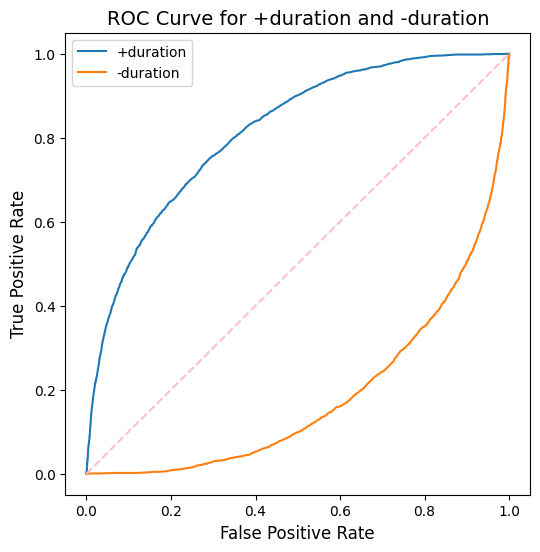

In [16]:
# Configure chart size
plt.figure(figsize=(6, 6))

# Calculate the ROC curve for 'duration'
fpr, tpr, _ = roc_curve(y_train, df_train.duration)
plt.plot(fpr, tpr, label='+duration')

# Calcular a curva ROC para '-duration'
fpr, tpr, _ = roc_curve(y_train, -df_train.duration)
plt.plot(fpr, tpr, label='-duration')

# Calculate the ROC curve for '-duration'
plt.plot([0, 1], [0, 1], color='pink', linestyle='--')

# Add title and labels
plt.title('ROC Curve for +duration and -duration', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)

plt.legend()
plt.show()

## Q2. Validation AUC

In [17]:
columns = categorical + numerical

# Checking to ensure columns are present in the DataFrame
missing_cols = [col for col in columns if col not in df_train.columns]
if missing_cols:
    raise ValueError(f"The following columns are missing from the DataFrame: {missing_cols}")

# Fill missing values with 0 to avoid errors
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

# Converting training data into dictionaries
train_dicts = df_train[columns].to_dict(orient='records')
val_dicts = df_val[columns].to_dict(orient='records')

# Vectorization of categorical and numeric columns
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

# Logistic regression model training
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# Probability predictions on the validation set
y_pred = model.predict_proba(X_val)[:, 1]

In [18]:
# Calculate AUC-ROC
auc_score = round(roc_auc_score(y_val, y_pred), 2)
print(f"AUC-ROC score: {auc_score}")

AUC-ROC score: 0.9


In [19]:
# Predict probabilities for positive class (1) using predict_proba
y_pred_prob = model.predict_proba(X_val)[:, 1]

# Calculate AUC-ROC using positive class probabilities
auc_score = roc_auc_score(y_val, y_pred_prob)

# View AUC-ROC result
print(f"AUC-ROC score: {round(auc_score, 2)}")

AUC-ROC score: 0.9


In [20]:
y_pred_bin = model.predict(X_val)

plt.figure(figsize=(6, 6))

fpr_prob, tpr_prob, _ = roc_curve(y_val, y_pred)
auc_prob_value = auc(fpr_prob, tpr_prob)  
plt.plot(fpr_prob, tpr_prob, label=f'Probability (AUC = {auc_prob_value:.2f})', color='red', linestyle='-')

fpr_bin, tpr_bin, _ = roc_curve(y_val, y_pred_bin)
auc_bin_value = auc(fpr_bin, tpr_bin)
plt.plot(fpr_bin, tpr_bin, label=f'Hard Prediction (AUC = {auc_bin_value:.2f})', color='green', linestyle='--')

plt.plot([0, 1], [0, 1], color='purple', linestyle='--')

# Plotzin
plt.title('ROC Curve: Probability vs Hard Prediction', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.show()

TypeError: 'numpy.float64' object is not callable

<Figure size 600x600 with 0 Axes>

## Q3. Precision and recall

In [21]:
# Function to compute confusion matrix metrics across multiple
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,1098,7944,0,0
10,0.1,926,1493,172,6451
20,0.2,712,693,386,7251
30,0.3,566,407,532,7537
40,0.4,462,272,636,7672
50,0.5,373,192,725,7752
60,0.6,290,137,808,7807
70,0.7,225,101,873,7843
80,0.8,148,67,950,7877
90,0.9,76,27,1022,7917


In [22]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

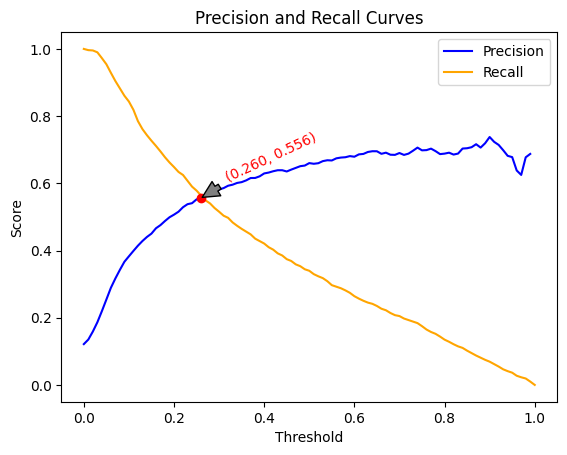

In [23]:
# Find where precision and recall curves intersect (within tolerance)
intersection = np.isclose(df_scores.p, df_scores.r, atol=0.01)  # Adjust tolerance as needed

# Extract the thresholds and corresponding precision and recall values at the intersection points
thresholds_intersection = df_scores.threshold[intersection]
precision_intersection = df_scores.p[intersection]
recall_intersection = df_scores.r[intersection]

# Plot
plt.plot(df_scores.threshold, df_scores.p, label='Precision', color='blue')
plt.plot(df_scores.threshold, df_scores.r, label='Recall', color='orange')

# Mark the points where precision and recall curves intersect
for t, p, r in zip(thresholds_intersection, precision_intersection, recall_intersection):
    plt.plot(t, p, 'ro')  # Mark intersection point with red dot
    plt.annotate(f'({t:.3f}, {p:.3f})', xy=(t, p), xytext=(t + 0.05, p + 0.05), color='red', rotation=25,
                 arrowprops=dict(facecolor='grey', shrink=0.05))  # Add annotation and arrow to the point

# Add title and labels
plt.title('Precision and Recall Curves')
plt.xlabel('Threshold')
plt.ylabel('Score')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [24]:
for t, p, r in zip(thresholds_intersection, precision_intersection, recall_intersection):
    print(f"Threshold: {t:.3f}, Precision: {p:.3f}, Recall: {r:.3f} curves intersect")

Threshold: 0.260, Precision: 0.556, Recall: 0.564 curves intersect


## Q4. F1 score threshold

In [25]:
# Calculate F1 score from precision and recall
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

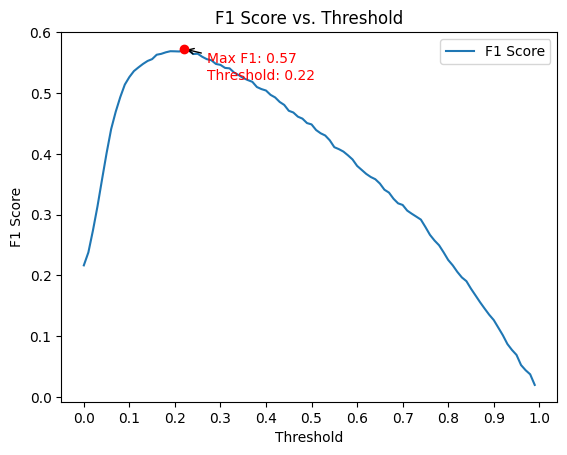

In [26]:
# Find the maximum F1 score and corresponding threshold
max_f1 = df_scores['f1'].max()  
max_f1_index = df_scores['f1'].idxmax()  
max_threshold = df_scores['threshold'][max_f1_index]  

# Plot the F1 score curve
plt.plot(df_scores.threshold, df_scores.f1, label='F1 Score')

# Highlight the point of maximum F1 score with a red marker
plt.scatter(max_threshold, max_f1, color='red', zorder=5) 

# Annotate the maximum F1 score and the corresponding threshold
plt.annotate(f'Max F1: {max_f1:.2f}\nThreshold: {max_threshold:.2f}', 
             xy=(max_threshold, max_f1), color='red',  
             xytext=(max_threshold + 0.05, max_f1 - 0.05),
             arrowprops=dict(arrowstyle='->', color='black')) 

plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')

plt.xticks(np.linspace(0, 1, 11))
plt.legend()
plt.show()

In [27]:
print(f"Threshold is {max_threshold:.2f} with F1 maximal {max_f1:.2f}")

Threshold is 0.22 with F1 maximal 0.57


## Q5. STD for 5-Fold CV

In [28]:
# Function to train a logistic regression model
def train(df_train, y_train, C=1.0):
    """
    Trains a logistic regression model using a DictVectorizer to handle categorical features.
    
    Parameters:
    df_train (DataFrame): The training dataset (features).
    y_train (array-like): The target labels for the training data.
    C (float): Inverse of regularization strength for Logistic Regression (default=1.0).
    
    Returns:
    dv (DictVectorizer): The fitted DictVectorizer.
    model (LogisticRegression): The trained Logistic Regression model.
    """
    
    # Convert the DataFrame into a list of dictionaries (each row as a dictionary)
    dicts = df_train[columns].to_dict(orient='records')

    # Initialize and fit DictVectorizer to transform categorical features into numerical format
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    # Initialize and train the logistic regression model
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    # Return the trained vectorizer and model
    return dv, model

# Function to make predictions using the trained model and DictVectorizer
def predict(df, dv, model):
    """
    Makes predictions using the trained logistic regression model.
    
    Parameters:
    df (DataFrame): The dataset for which predictions are to be made (features).
    dv (DictVectorizer): The fitted DictVectorizer used during training.
    model (LogisticRegression): The trained Logistic Regression model.
    
    Returns:
    y_pred (array): Predicted probabilities for the positive class (1).
    """
    # Convert the DataFrame into a list of dictionaries (each row as a dictionary)
    dicts = df[columns].to_dict(orient='records')

    # Transform the input data using the fitted DictVectorizer
    X = dv.transform(dicts)

    # Use the model to predict probabilities for the positive class (1)
    y_pred = model.predict_proba(X)[:, 1]

    # Return the predicted probabilities
    return y_pred

In [29]:
scores = []

# Set up K-Fold cross-validation with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Define the columns to be used (make sure this is defined globally or passed to the function)
columns = df_full_train.columns.drop('y')  # Assuming 'y' is the target column

# K-Fold cross-validation loop
for train_idx, val_idx in kfold.split(df_full_train):
    # Split the data into training and validation sets based on the fold indices
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    # Separate the target variable 'y' from the feature sets
    y_train = df_train.y
    y_val = df_val.y

    # Train the model on the current training fold
    dv, model = train(df_train, y_train, C=1.0)

    # Make predictions on the current validation fold
    y_pred = predict(df_val, dv, model)

    # Calculate AUC score for the current fold
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)  # Store the AUC score

# Calculate the mean and standard deviation of the AUC scores across all folds
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.906 +- 0.006


## Q6. Best C

In [30]:
# Set up K-Fold cross-validation with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Function to evaluate different values of C using cross-validation
def evaluate_logistic_regression(df_full_train, values_of_C):
    """
    Evaluates logistic regression model with different values of regularization parameter C
    using K-Fold cross-validation and prints the mean and standard deviation of AUC scores.

    Parameters:
    df_full_train (DataFrame): Full training dataset containing features and target variable 'y'.
    values_of_C (list): List of values for regularization parameter C to evaluate.
    """
    # Iterate over each value of C
    for C in values_of_C:
        scores = []

        # K-Fold cross-validation loop
        for train_idx, val_idx in kfold.split(df_full_train):
            # Split the data into training and validation sets
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            # Separate the target variable 'y'
            y_train = df_train.y
            y_val = df_val.y

            # Train the model with the current value of C
            dv, model = train(df_train, y_train, C=C)

            # Make predictions on the validation set
            y_pred = predict(df_val, dv, model)

            # Calculate AUC-ROC score for this fold
            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)

        # Print the mean and standard deviation of AUC scores for the current value of C
        print('C={:<8}, AUC= {:.3f} +- {:.3f}'.format(C, np.mean(scores), np.std(scores)))

# Values of C to evaluate
values_of_C = [0.000001, 0.001, 1]

# Call the function to evaluate the model with different values of C
evaluate_logistic_regression(df_full_train, values_of_C)

C=1e-06   , AUC= 0.701 +- 0.009
C=0.001   , AUC= 0.861 +- 0.007
C=1       , AUC= 0.906 +- 0.006
